<a href="https://colab.research.google.com/github/navpreet025/Thapar-summer-school-hack-2/blob/main/hack_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 2: Load the Data
train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test (1).csv')

# Step 3: Explore the Data (Optional)
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(train.head())

# Step 4: Prepare Features and Target
target = 'yield'
ID_col = 'id'
X = train.drop([target, ID_col], axis=1)
y = train[target]
X_test = test.drop([ID_col], axis=1)

# Step 5: Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Validate the Model
val_preds = model.predict(X_val)
mae = mean_absolute_error(y_val, val_preds)
print(f'Validation MAE: {mae:.4f}')

# Step 8: Predict on Test Data
test_preds = model.predict(X_test)

# Step 9: Create Submission File
submission = pd.DataFrame({
    'id': test[ID_col],
    'yield': test_preds
})

# Step 10: Save Submission File with Name & Roll No.
submission.to_csv('Navpreet_Kaur_12301163.csv', index=False)
print("✅ Submission file 'Navpreet_Kaur_12301163.csv' saved successfully.")


Train shape: (15000, 19)
Test shape: (10000, 18)
   id   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0   68.0       12.5      0.25     0.25     0.25   0.50              94.6   
1   1  514.0       25.0      0.50     0.25     0.50   0.75              94.6   
2   2  547.0       12.5      0.25     0.25     0.50   0.75              69.7   
3   3  535.0       25.0      0.50     0.25     0.50   0.75              69.7   
4   4  223.0       12.5      0.25     0.25     0.50   0.75              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              57.2                  79.0              68.2              33.0   
1              57.2                  79.0              68.2              33.0   
2              42.1                  58.2              50.2              24.3   
3              42.1                  58.2              50.2              24.3   
4              46.8                  64.7              55.8      

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load the data
train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test (1).csv')

# Prepare features and target
target = 'yield'
ID_col = 'id'
X = train.drop([target, ID_col], axis=1)
y = train[target]
X_test = test.drop([ID_col], axis=1)

# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model (disable label encoder warning)
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    verbosity=0
)

# Fit the model without early stopping
model.fit(X_train, y_train)

# Validate
val_preds = model.predict(X_val)
mae = mean_absolute_error(y_val, val_preds)
print(f"✅ Improved Validation MAE: {mae:.4f}")

# Predict on test
test_preds = model.predict(X_test)

# Create and save submission file
submission = pd.DataFrame({
    'id': test[ID_col],
    'yield': test_preds
})
submission.to_csv('Navpreet_Kaur_12301163.csv', index=False)
print("📁 Submission file 'Navpreet_Kaur_12301163.csv' saved.")


✅ Improved Validation MAE: 257.1745
📁 Submission file 'Navpreet_Kaur_12301163.csv' saved.


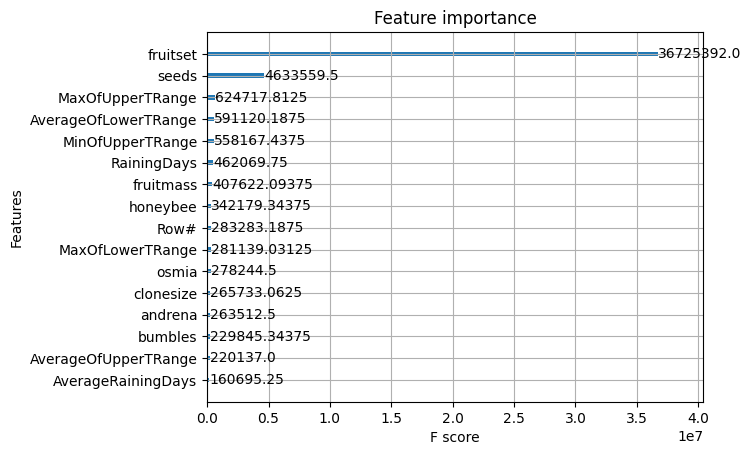

In [ ]:
# After model.fit()
import matplotlib.pyplot as plt

xgb.plot_importance(model, importance_type='gain')
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [300, 500, 800],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0]
}


In [ ]:
model = xgb.XGBRegressor(n_estimators=800, learning_rate=0.03, max_depth=8,
                         subsample=0.8, colsample_bytree=0.8, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
!pip install lightgbm
import lightgbm as lgb

model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.03, max_depth=7, random_state=42)
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 17
[LightGBM] [Info] Start training from score 5992.148656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMRegressor(learning_rate=0.03, max_depth=7, n_estimators=500,
              random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("CV MAE scores:", mae_scores)
print("Average CV MAE:", mae_scores.mean())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 17
[LightGBM] [Info] Start training from score 5997.437890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=6, random_state=42)

rf.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

pred1 = rf.predict(X_val)
pred2 = xgb_model.predict(X_val)
ensemble_preds = (pred1 + pred2) / 2

print("Ensembled MAE:", mean_absolute_error(y_val, ensemble_preds))


Ensembled MAE: 252.3445184531823


In [ ]:
# Predict on test set
test_preds = model.predict(X_test.values)

# Create submission
submission = pd.DataFrame({
    'id': test[ID_col],
    'yield': test_preds
})
submission.to_csv('Navpreet_Kaur_12301163.csv', index=False)
print("✅ Submission file 'Navpreet_Kaur_12301163.csv' saved.")

✅ Submission file 'Navpreet_Kaur_12301163.csv' saved.


In [ ]:
# Feature Engineering - Add basic interaction terms
X['feature_sum'] = X.sum(axis=1)
X['feature_mean'] = X.mean(axis=1)
X['feature_std'] = X.std(axis=1)

X_test['feature_sum'] = X_test.sum(axis=1)
X_test['feature_mean'] = X_test.mean(axis=1)
X_test['feature_std'] = X_test.std(axis=1)


In [ ]:
!pip install lightgbm --quiet
import lightgbm as lgb


In [ ]:
lgb_model = lgb.LGBMRegressor(n_estimators=800, learning_rate=0.03, max_depth=8, random_state=42)
lgb_model.fit(X_train, y_train)

# Predict
lgb_val_preds = lgb_model.predict(X_val)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 20
[LightGBM] [Info] Start training from score 5992.148656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
# Predict on validation set
rf_val_preds = rf.predict(X_val)
xgb_val_preds = xgb_model.predict(X_val)
lgb_val_preds = lgb_model.predict(X_val)

# Ensemble predictions
ensemble_val_preds = (rf_val_preds + xgb_val_preds + lgb_val_preds) / 3
mae = mean_absolute_error(y_val, ensemble_val_preds)
print(f"📉 Triple Ensemble MAE: {mae:.4f}")


📉 Triple Ensemble MAE: 252.2112


In [ ]:
# Step 7: Predict on Test Set
rf_test_preds = rf.predict(X_test)
xgb_test_preds = xgb_model.predict(X_test.values)
lgb_test_preds = lgb_model.predict(X_test)

ensemble_test_preds = (rf_test_preds + xgb_test_preds + lgb_test_preds) / 3

# Step 8: Save Submission
submission = pd.DataFrame({
    'id': test[ID_col],
    'yield': ensemble_test_preds
})
submission.to_csv('Navpreet_Kaur_12301163.csv', index=False)
print("✅ Final ensemble submission saved as 'Navpreet_Kaur_12301163.csv'")


✅ Final ensemble submission saved as 'Navpreet_Kaur_12301163.csv'


In [ ]:
# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 2: Load Data
train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test (1).csv')

# Step 3: Feature Engineering
target = 'yield'
ID_col = 'id'
X = train.drop([target, ID_col], axis=1)
y = train[target]
X_test = test.drop([ID_col], axis=1)

# Add extra features
for df in [X, X_test]:
    df['feature_sum'] = df.sum(axis=1)
    df['feature_mean'] = df.mean(axis=1)
    df['feature_std'] = df.std(axis=1)

# Step 4: Train/Val Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_val_preds = rf.predict(X_val)

xgb_model = xgb.XGBRegressor(n_estimators=800, learning_rate=0.03, max_depth=8,
                             subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train.values, y_train.values)
xgb_val_preds = xgb_model.predict(X_val.values)

lgb_model = lgb.LGBMRegressor(n_estimators=800, learning_rate=0.03, max_depth=8, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_val_preds = lgb_model.predict(X_val)

# Step 6: Ensemble
ensemble_val_preds = (rf_val_preds + xgb_val_preds + lgb_val_preds) / 3
mae = mean_absolute_error(y_val, ensemble_val_preds)
print(f"📉 Triple Ensemble MAE: {mae:.4f}")

# Step 7: Predict on Test Set
rf_test_preds = rf.predict(X_test)
xgb_test_preds = xgb_model.predict(X_test.values)
lgb_test_preds = lgb_model.predict(X_test)

ensemble_test_preds = (rf_test_preds + xgb_test_preds + lgb_test_preds) / 3

# Step 8: Save Submission
submission = pd.DataFrame({
    'id': test[ID_col],
    'yield': ensemble_test_preds
})
submission.to_csv('Navpreet_Kaur_12301163.csv', index=False)
print("✅ Final ensemble submission saved as 'Navpreet_Kaur_12301163.csv'")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 20
[LightGBM] [Info] Start training from score 5992.148656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga